In [28]:
#Importing all the required libraries
import pandas
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# In this project, I have taken the data of a soil health data of 13 Districts in Andhra Pradesh state from India.


# From all the columns I am going to use pirticular columns and visualize the data and retreive some useful information from it.

In [29]:
#Reading the "csv" file and displaying the first five rows of the file
dframe = pandas.read_csv("AP Primary Sector Farmerwise Soil Health Data of 13 districts.csv")
dframe.head()

,Sl no,Date,Farmer No,Macro/ Micro nutrient,Farmer Name,District,Mandal,Village,Latitude,Longitude,...,Exch-K,Avail-Ca,Avail-Mg,Avail-S,Avail-Zn,Avail-B,Avail-Fe,Avail-Cu,Avail-Mn,Time
0,1,1/1/2015,1910,RK2276,P.Krishna Naik,Anantapur,Penukonda,Gonipeta,14.08,77.69,...,41,587,101,5.16,0.30,0.17,8.89,0.51,15.24,1/1/2015
1,2,1/1/2015,1911,RK2277,Kallu Thippe Naik,Anantapur,Penukonda,Gonipeta,14.09,77.69,...,102,811,261,9.91,0.36,0.57,3.24,0.44,6.90,1/1/2015
2,3,1/1/2015,1912,RK2278,P.Duble Bai,Anantapur,Penukonda,Gonipeta,14.09,77.69,...,46,582,48,3.77,0.37,0.19,5.54,0.42,8.34,1/1/2015
3,4,1/1/2015,1913,RK2279,H.Marekka (Kamma),Anantapur,Penukonda,Gonipeta,14.10,77.70,...,35,3048,52,4.14,0.23,0.21,1.79,0.67,4.17,1/1/2015
4,5,1/1/2015,1914,RK2280,M.Alevelamma,Anantapur,Penukonda,Gonipeta,14.09,77.69,...,76,511,84,1.45,0.36,0.22,22.26,0.45,9.20,1/1/2015


In [30]:
# Checking the data type of each column of the csv file
dframe.dtypes

Sl no                      int64
Date                      object
Farmer No                 object
Macro/ Micro nutrient     object
Farmer Name               object
District                  object
Mandal                    object
Village                   object
Latitude                 float64
Longitude                float64
Survey No.                object
Soil type                 object
Fathers Name              object
Acers                     object
Crop before               object
pH                       float64
EC                       float64
OC                        object
Avail-P                  float64
Exch-K                     int64
Avail-Ca                   int64
Avail-Mg                   int64
Avail-S                  float64
Avail-Zn                 float64
Avail-B                  float64
Avail-Fe                 float64
Avail-Cu                 float64
Avail-Mn                 float64
Time                      object
dtype: object


# From the above dataset, I am using the columns with header names "District, pH, EC, Avail-P and Exch-K.

# I have opteed for pH and EC as they give much more information about the soil type. From all the elements columns I prefered taking Avail-P and Exch-K as they are primary nutrients for a plant growth.
 
# I will check the values in each column one by one.

# In the csv file, I want to sanity check the numerical values for the columns which I am using in the choosen dataset.

# By using dataframe.describe , I am gong to check the range and variance in the data.

In [31]:
dframe['pH'].describe()

count    4815.000000
mean        7.477844
std         1.052134
min         4.150000
25%         6.740000
50%         7.810000
75%         8.270000
max         9.890000
Name: pH, dtype: float64

In [32]:
dframe['EC'].describe()


count    4815.000000
mean        0.489531
std         1.045581
min         0.010000
25%         0.110000
50%         0.220000
75%         0.510000
max        27.500000
Name: EC, dtype: float64

In [33]:
dframe['Avail-P'].describe()


count    4815.000000
mean       16.704285
std        18.810818
min         0.450000
25%         5.160000
50%        10.930000
75%        21.410000
max       361.940000
Name: Avail-P, dtype: float64

In [34]:
dframe['Exch-K'].describe()

count    4815.000000
mean      159.676012
std       135.616280
min        12.000000
25%        82.000000
50%       129.000000
75%       196.000000
max      2409.000000
Name: Exch-K, dtype: float64

# From the above outputs, we can figure out that the ranges of all the columns are reliable and the standard deviations of all the columns indicates that the values in the column are having significient variance among them.

    

# Now I am going to plot the bar graph group by District values in the  X-axis and their mean pH values in the Y-axis.

# I am assigning colours to the bar graph based on its value in Y-axis.

# I have come to know the pH ranges of different types of soil from the following websites
https://www.esf.edu/pubprog/brochure/soilph/soilph.htm

https://www.qld.gov.au/environment/land/management/soil/soil-properties/ph-levels

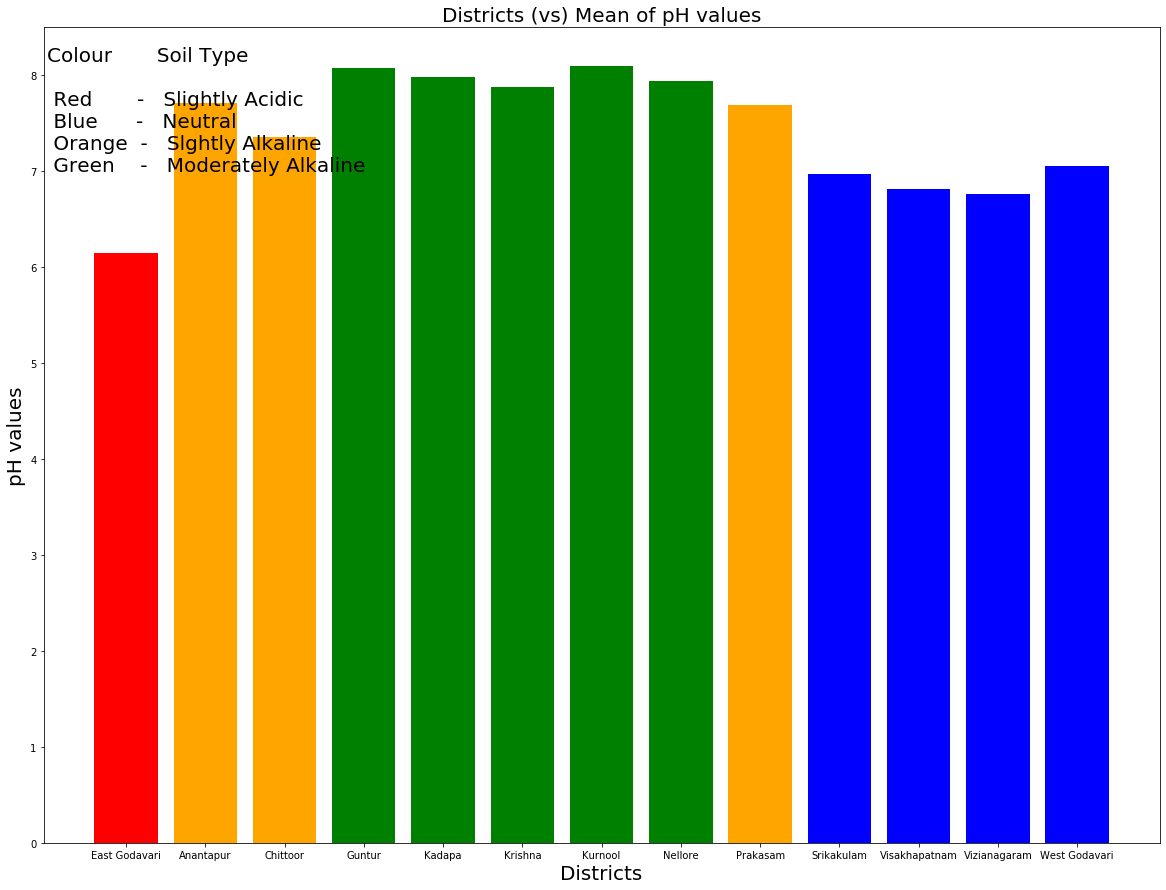

In [35]:
# Group by District column
x=(dframe['District'].unique())
# Finding the mean of pH values group by District column
y=dframe.groupby(['District'])['pH'].mean()
# Giving conditions to the pH mean values
mask1 = y <= 6.5
mask2 = y > 6.5 
mask3 = y > 7.3
mask4 = y > 7.8
# Creating a figure using the variable sub and assigning the dimentons of the figure.
f, sub = plt.subplots(figsize=(20,15))
# Applying the conditions to give colour to the bar graph based on its value.
plt.bar(x[mask1], y[mask1], color = 'red')
plt.bar(x[mask2], y[mask2], color = 'blue')
plt.bar(x[mask3], y[mask3], color = 'orange')
plt.bar(x[mask4], y[mask4], color = 'green')
# Labeling the X-axis
plt.xlabel("Districts",size=20)
# Labeling the Y-axis
plt.ylabel("pH values", size=20)
# Giving heading to the graph
plt.title("Districts (vs) Mean of pH values",size=20)
# Writing the text in the graph  to understand the information in the graph clearly
plt.text(-1,7,'Colour       Soil Type\n \n Red       -   Slightly Acidic\n Blue      -   Neutral\n Orange  -   Slghtly Alkaline \n Green    -   Moderately Alkaline',size=20,)
plt.show()

# From the above bar graph,we can see check the type of soil (Acidic or Alkaline) based on its mean pH value.

# I am plotting a bar graph group by district values in X-axis an mean EC values in Y-axis.

# Similar to the above graph, I am going to assign colours to the bar graph based on its value in Y-axis.

# The ranges for different types of soils based on the different EC values is assigned based on the following papers

https://www.nrcs.usda.gov/Internet/FSE_DOCUMENTS/nrcs142p2_053280.pdf

https://edis.ifas.ufl.edu/pdffiles/SS/SS11800.pdf

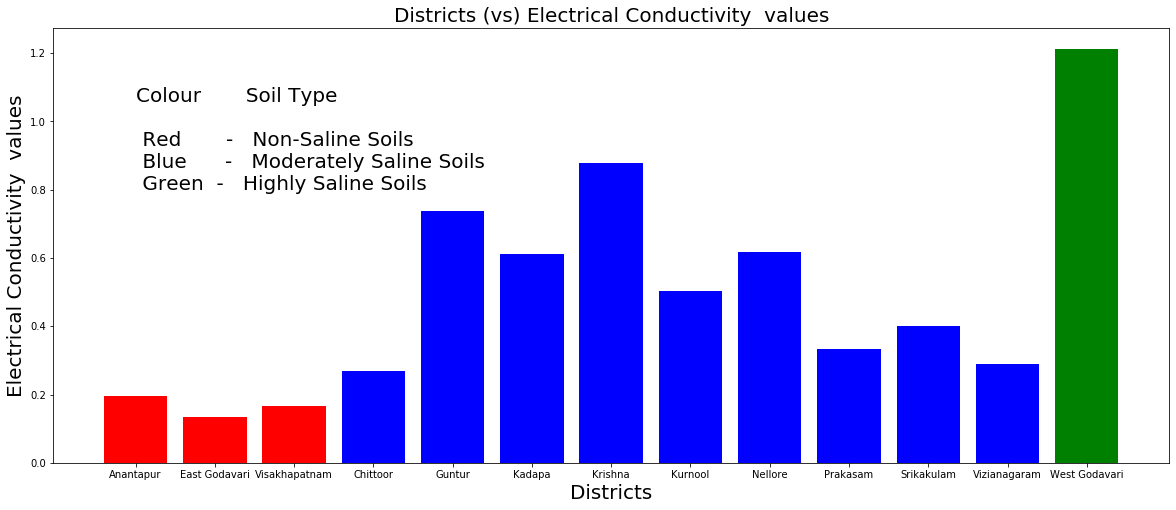

In [36]:
# Finding the mean of EC values group by District column
y=dframe.groupby(['District'])['EC'].mean()
# Giving conditions to the EC mean values
mask1 = y <= 0.2
mask2 = y >  0.2
mask3 = y > 1
# Creating a figure using the variable sub and assigning the dimentons of the figure.
f, sub = plt.subplots(figsize=(20,8))
# Applying the conditions to give colour to the bar graph based on its value.
plt.bar(x[mask1], y[mask1], color = 'red')
plt.bar(x[mask2], y[mask2], color = 'blue')
plt.bar(x[mask3], y[mask3], color = 'green')
# Labeling the X-axis
plt.xlabel("Districts",size=20)
# Labeling the Y-axis
plt.ylabel("Electrical Conductivity  values", size=20)
# Giving heading to the graph
plt.title("Districts (vs) Electrical Conductivity  values",size=20)
# Writing the text in the graph to understand the information in the graph clearly
plt.text(0,.8,'Colour       Soil Type\n \n Red       -   Non-Saline Soils\n Blue      -   Moderately Saline Soils\n Green  -   Highly Saline Soils',size=20,)


plt.show()



# From the above bar graph,we can see check the saline nature of soil of each distict based on its mean EC value.

# Scatter plot between pH values and EC values.

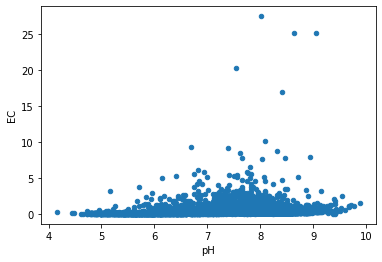

In [37]:
dframe.plot.scatter(x ='pH', y ='EC') 
plt.show()


# From the graph we can sence that pH and EC values have moderate , linear relationship.

In [38]:
# Finding the mean of Phosphorus content in the soil group by District column
a=dframe.groupby(['District'])['Avail-P'].mean()
# Finding the mean of Potassium content in the soil group by District column
b=dframe.groupby(['District'])['Exch-K'].mean()

# Here I am going to plot the Districts in X-axis and their mean Phosphorus values on Y-axis

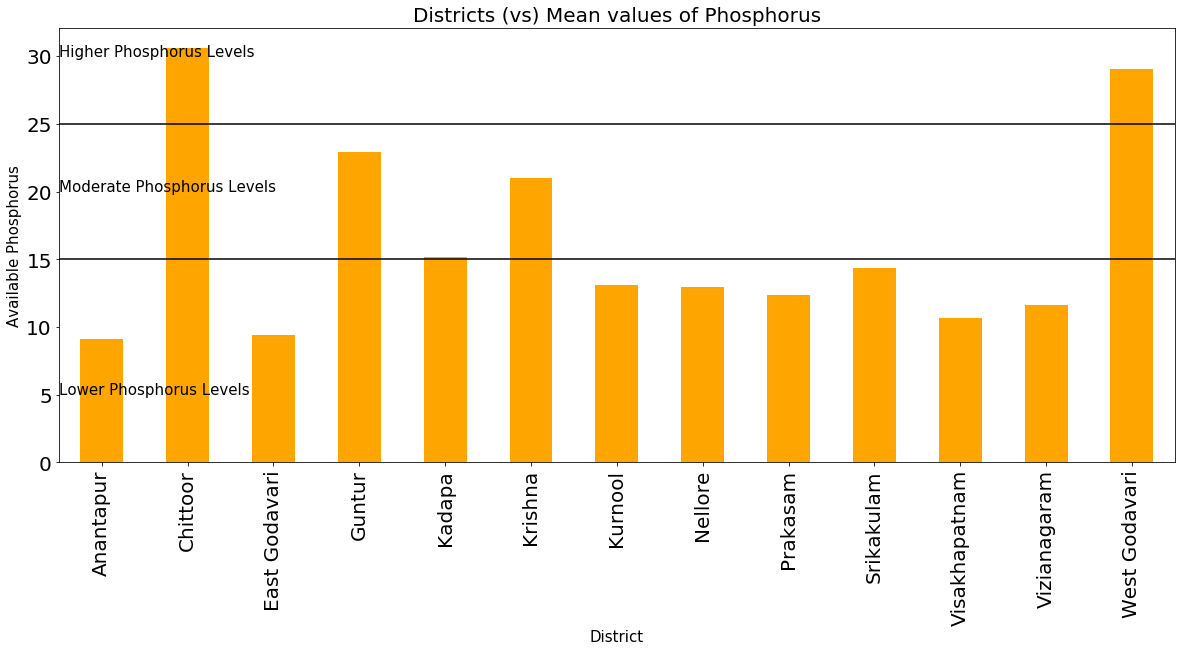

In [39]:
# Bar graph from pandas.series variable a
a.plot(kind='bar', figsize=(20,8), color="orange", fontsize=20);
# Title of graph
plt.title("Districts (vs) Mean values of Phosphorus", fontsize=20)
# Labeling the X-axis
plt.xlabel("District", fontsize=15)
# Labeling the Y-axis
plt.ylabel("Available Phosphorus", fontsize=15)
#Drawing a horizontal line at y = 25
plt.axhline(y=25,color='black')
#Drawing a horizontal line at y = 15
plt.axhline(y=15,color='black')
# Writing the text in the graph to understand the information in the graph clearly
plt.text(-0.5,30,"Higher Phosphorus Levels ",size=15)
plt.text(-.5,20,"Moderate Phosphorus Levels ",size=15)
plt.text(-.5,5,"Lower Phosphorus Levels ",size=15)
plt.show()

# In the graph, we can come to know weather the Phosphorous level is Higher, Moderate or Lower in a District.

# The ranges of different phosphorus levels are taken from the below websites

https://extension.psu.edu/programs/nutrient-management/educational/soil-fertility/managing-phosphorus-for-crop-production

https://ag.purdue.edu/agry/Purdue%20Agroecology/Kteam/fs719.pdf?Mobile=1&Source=%2Fa

# Now I am going to plot the Districts in X-axis and their mean Potassium values on Y-axis

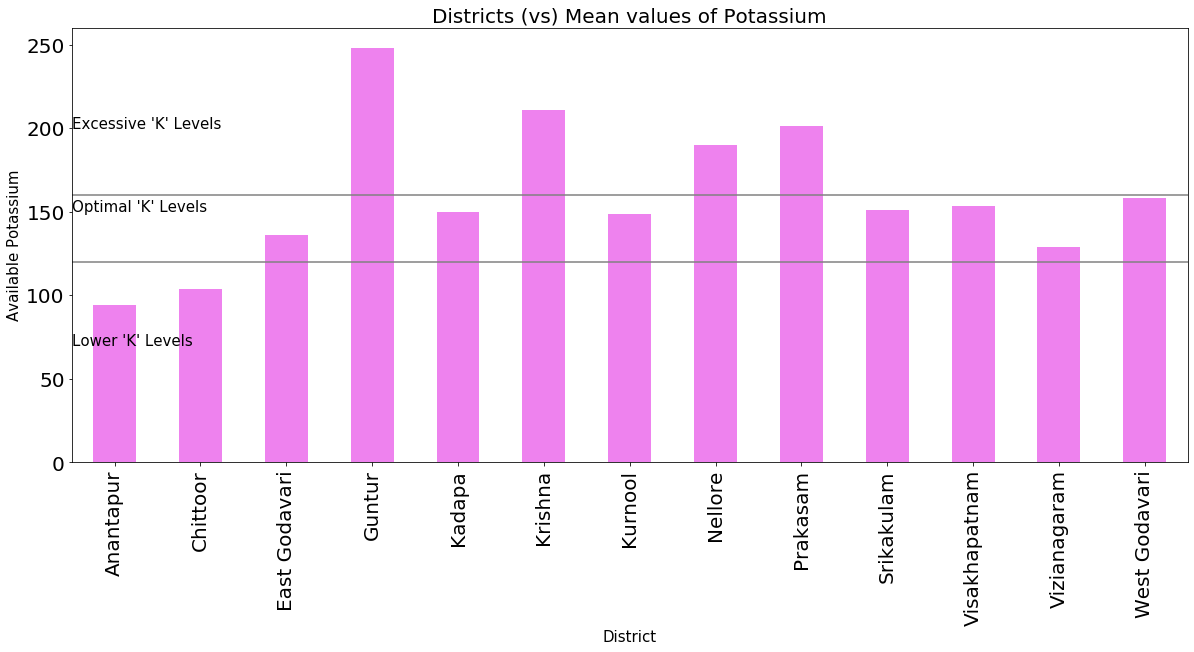

In [40]:
# Bar graph from pandas.series variable b
b.plot(kind='bar', figsize=(20,8), color="violet", fontsize=20);
# Title of graph
plt.title("Districts (vs) Mean values of Potassium", fontsize=20)
# Labeling the X-axis
plt.xlabel("District", fontsize=15)
# Labeling the Y-axis
plt.ylabel("Available Potassium", fontsize=15)
#Drawing a horizontal line at y = 120
plt.axhline(y=120,color='gray')
#Drawing a horizontal line at y = 160
plt.axhline(y=160,color='gray')
# Writing the text in the graph to understand the information in the graph clearly
plt.text(-0.5,150,"Optimal 'K' Levels ",size=15)
plt.text(-.5,200,"Excessive 'K' Levels ",size=15)
plt.text(-.5,70,"Lower 'K' Levels ",size=15)
plt.show()

# In the graph, we can come to know weather the Potassium level are Excessive, Optimal or Lower in a District.

# The ranges of different potassium levels are taken from the below websites.

http://al-labs-plains.com/soil/2511974
